<>:433: SyntaxWarning: invalid escape sequence '\d'
<>:433: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2943172060.py:433: SyntaxWarning: invalid escape sequence '\d'
  df_clean['term'] = df_clean['term'].astype(str).str.extract('(\d+)').astype(float)


Kaggle credentials loaded from Colab Secrets.
Dataset URL: https://www.kaggle.com/datasets/wordsforthewise/lending-club
License(s): CC0-1.0
lending-club.zip: Skipping, found more recently modified local copy (use --force to force download)
Attempting to unzip the required file...
Archive:  lending-club.zip
  inflating: ./accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv  
Moving extracted file...
Dataset download and extraction steps executed.
Loading dataset...

DATASET OVERVIEW
Shape: 2,260,701 rows × 151 columns
Memory Usage: 5992.29 MB

First 5 rows:
         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0     

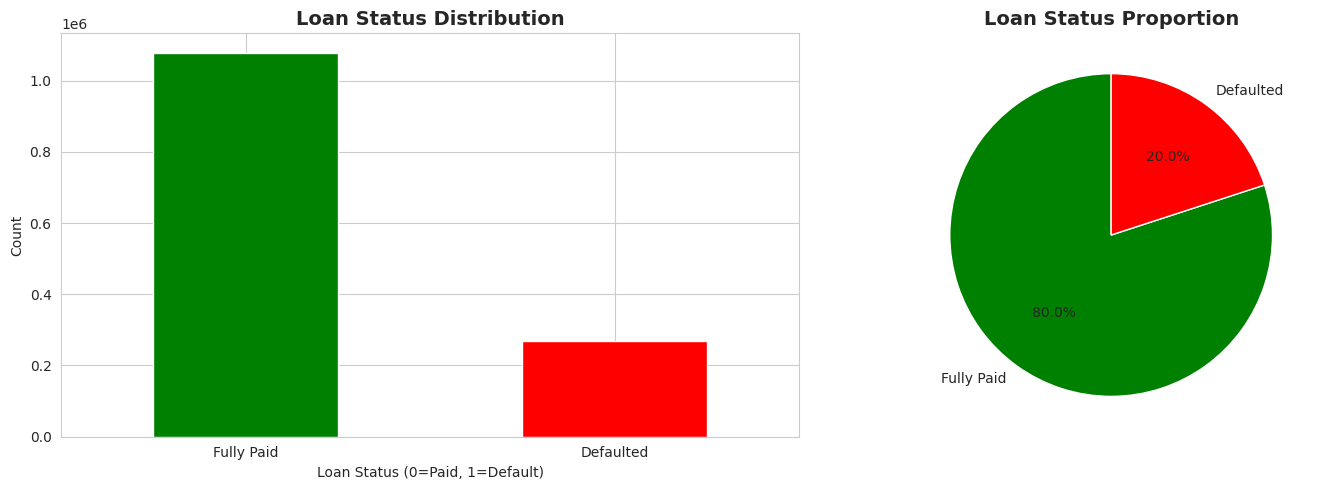


MISSING VALUES ANALYSIS

Columns with missing values: 113 out of 152

Top 20 columns with highest missing percentages:
                                                                                column  \
member_id                                                                    member_id   
next_pymnt_d                                                              next_pymnt_d   
orig_projected_additional_accrued_interest  orig_projected_additional_accrued_interest   
hardship_loan_status                                              hardship_loan_status   
hardship_dpd                                                              hardship_dpd   
hardship_start_date                                                hardship_start_date   
hardship_end_date                                                    hardship_end_date   
hardship_status                                                        hardship_status   
hardship_type                                                         

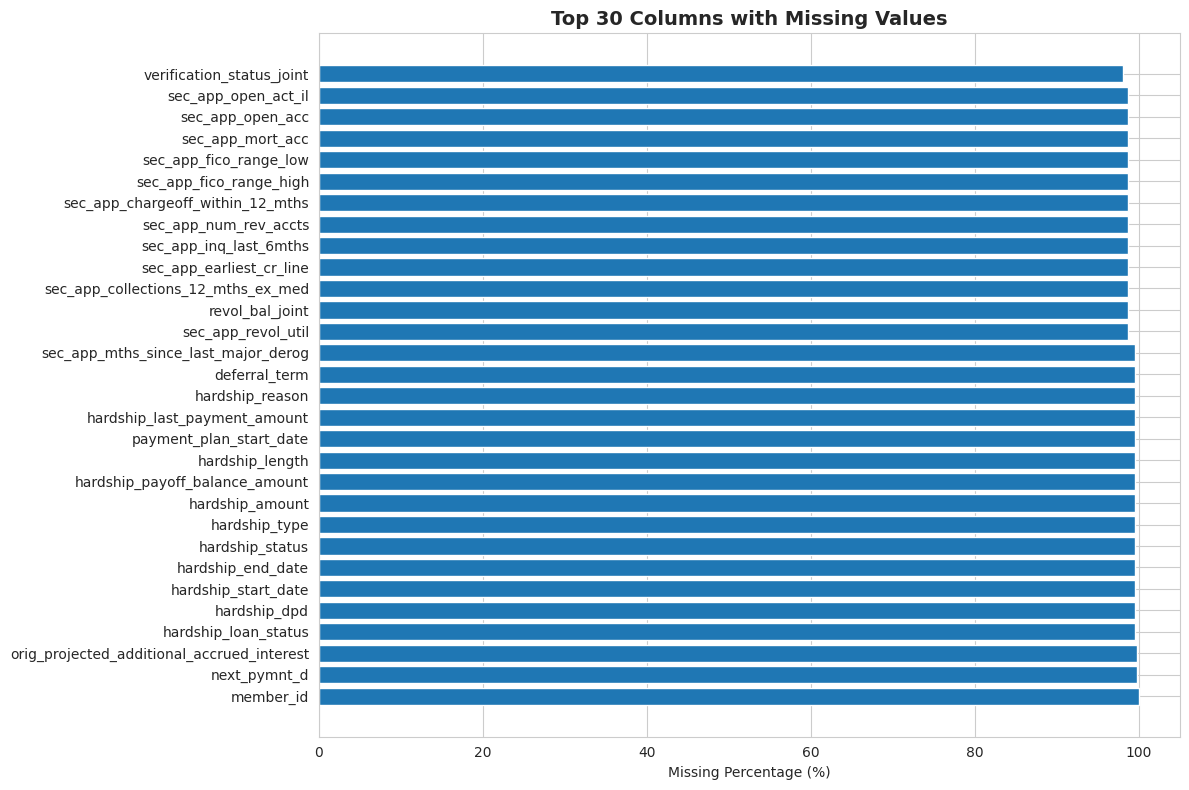


FEATURE SELECTION

Selected 25 features (plus target variable)
New dataset shape: (1348099, 26)

FEATURE SELECTION JUSTIFICATION

Feature Selection Rationale:

1. LOAN CHARACTERISTICS (8 features):
   - loan_amnt, term, int_rate, installment: Core loan parameters
   - grade, sub_grade: LendingClub's risk assessment
   - These directly impact repayment ability and risk

2. BORROWER FINANCIAL PROFILE (5 features):
   - annual_inc, emp_length, home_ownership: Financial stability indicators
   - dti: Measures existing debt burden
   - verification_status: Income verification adds credibility

3. CREDIT HISTORY (10 features):
   - delinq_2yrs, inq_last_6mths, pub_rec, pub_rec_bankruptcies: Past behavior
   - open_acc, total_acc, mort_acc: Credit experience
   - revol_bal, revol_util: Current credit utilization
   - earliest_cr_line: Credit history length

4. APPLICATION CONTEXT (4 features):
   - purpose: Loan intent affects default risk
   - addr_state, zip_code: Geographic risk factors
 

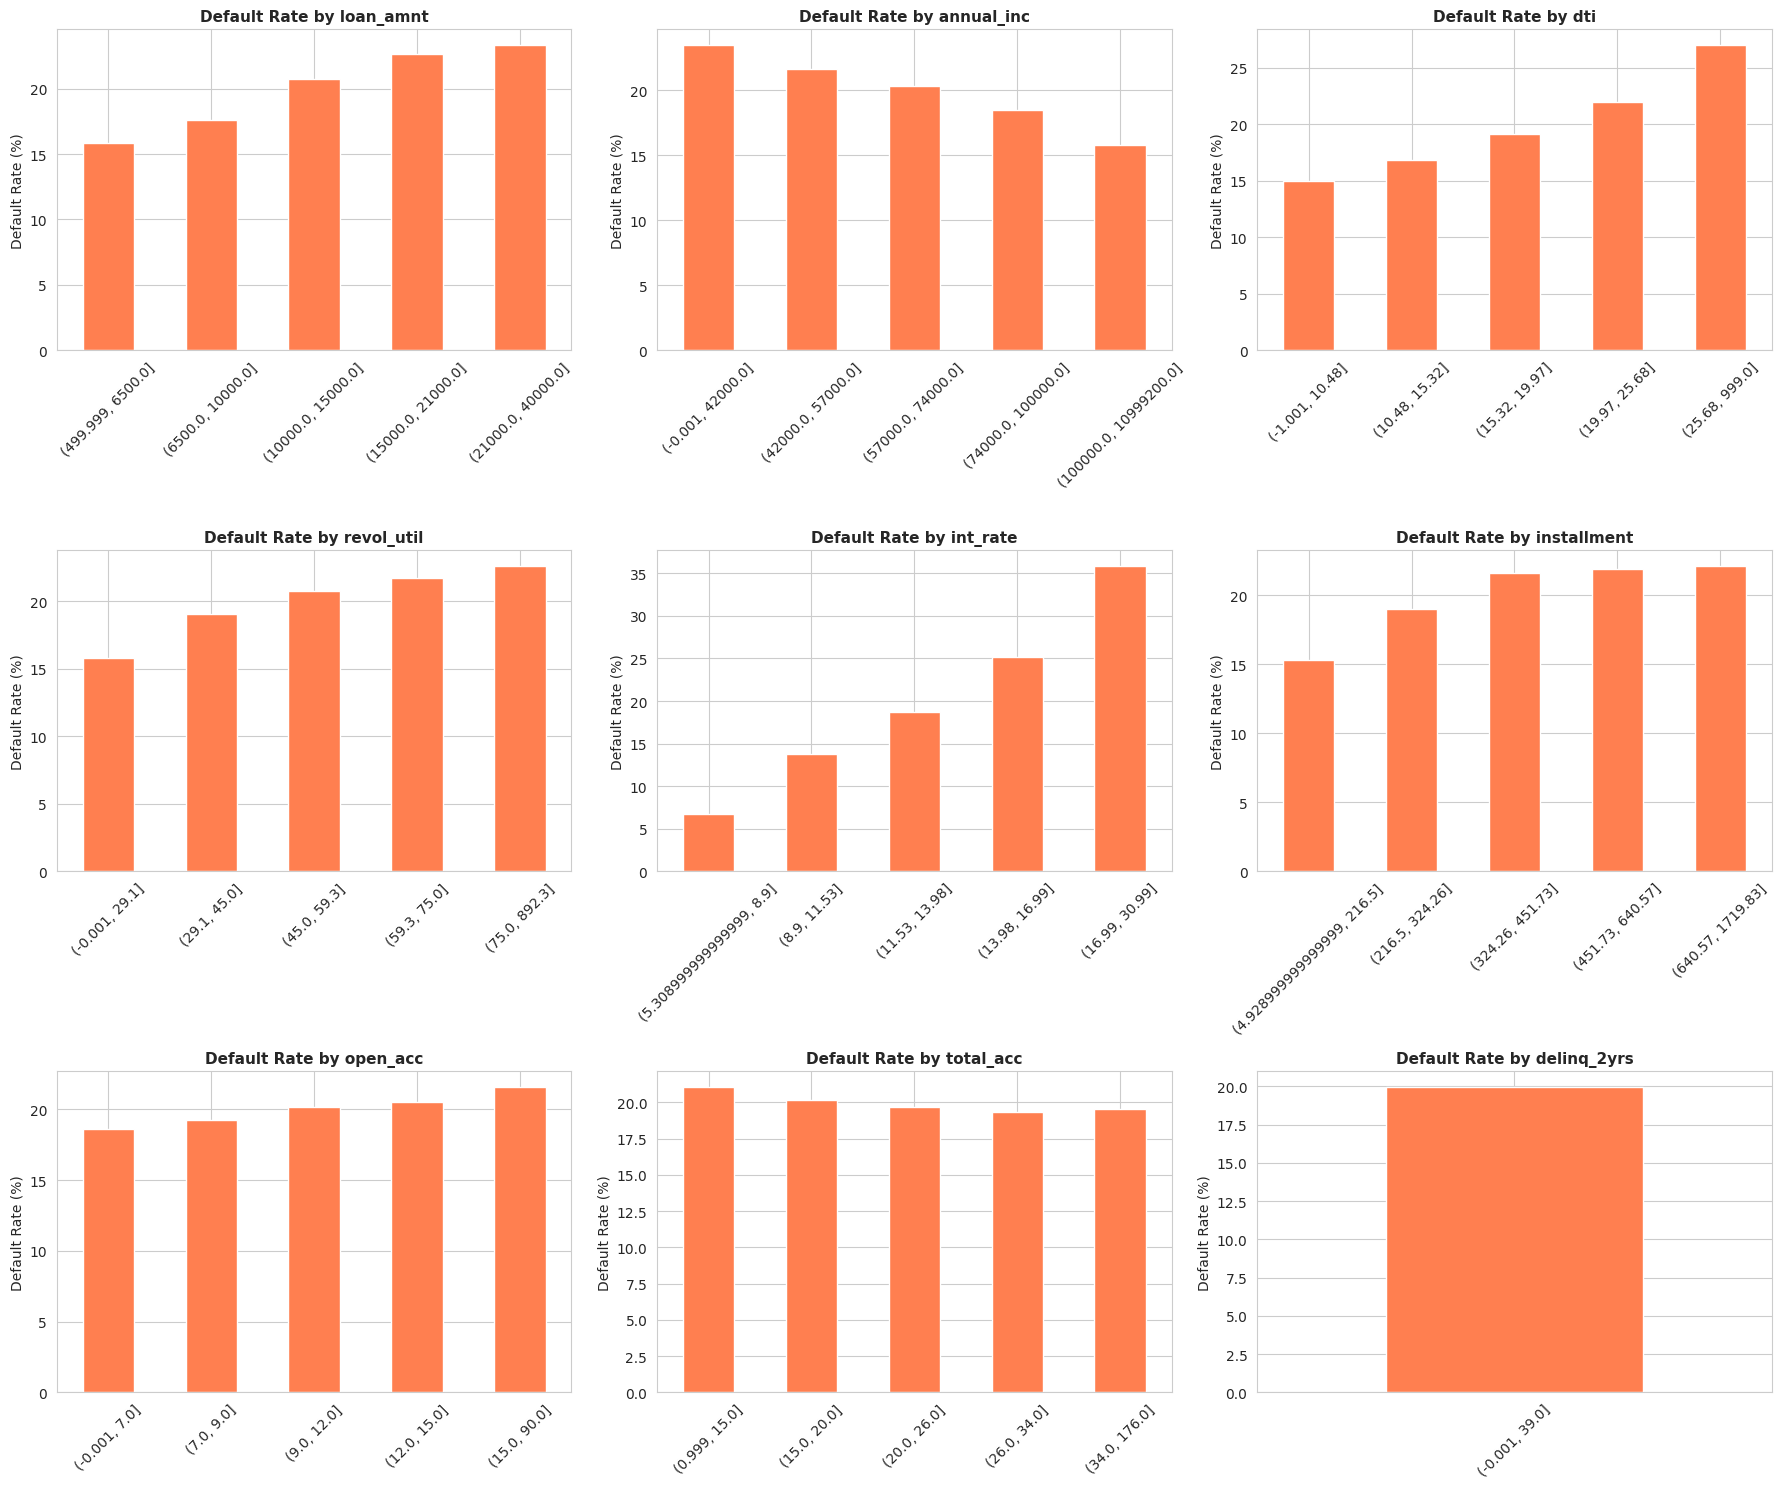

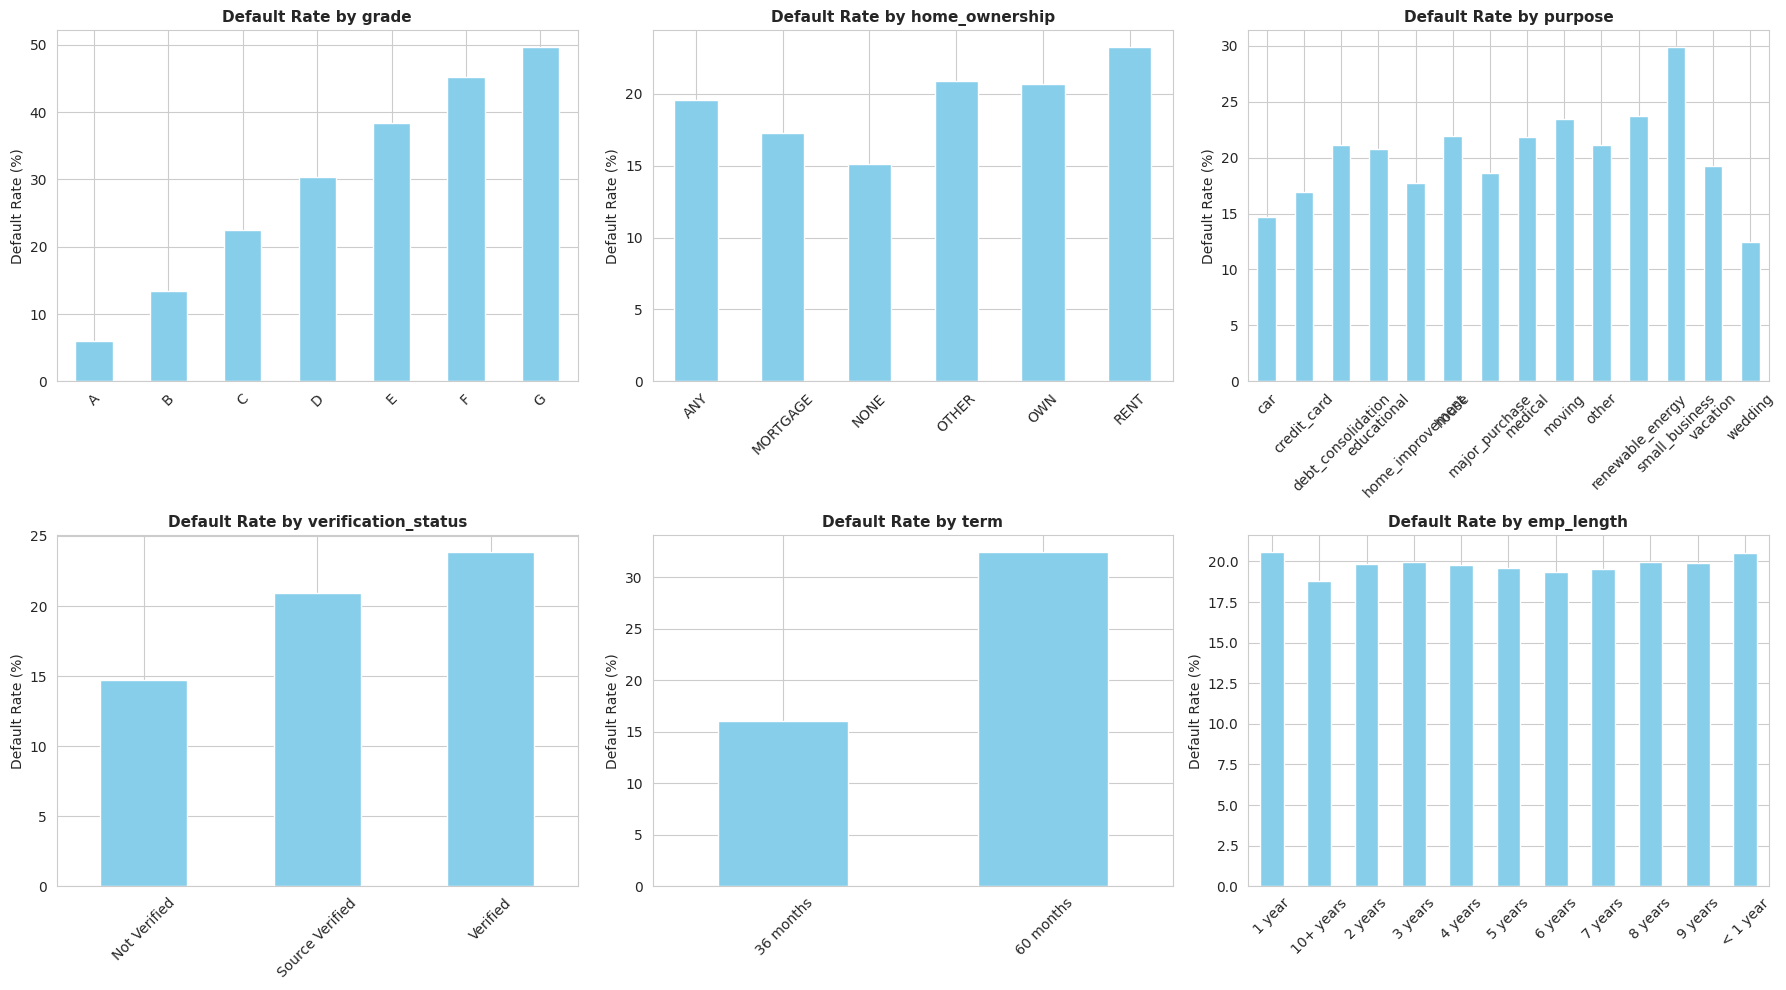


CORRELATION ANALYSIS


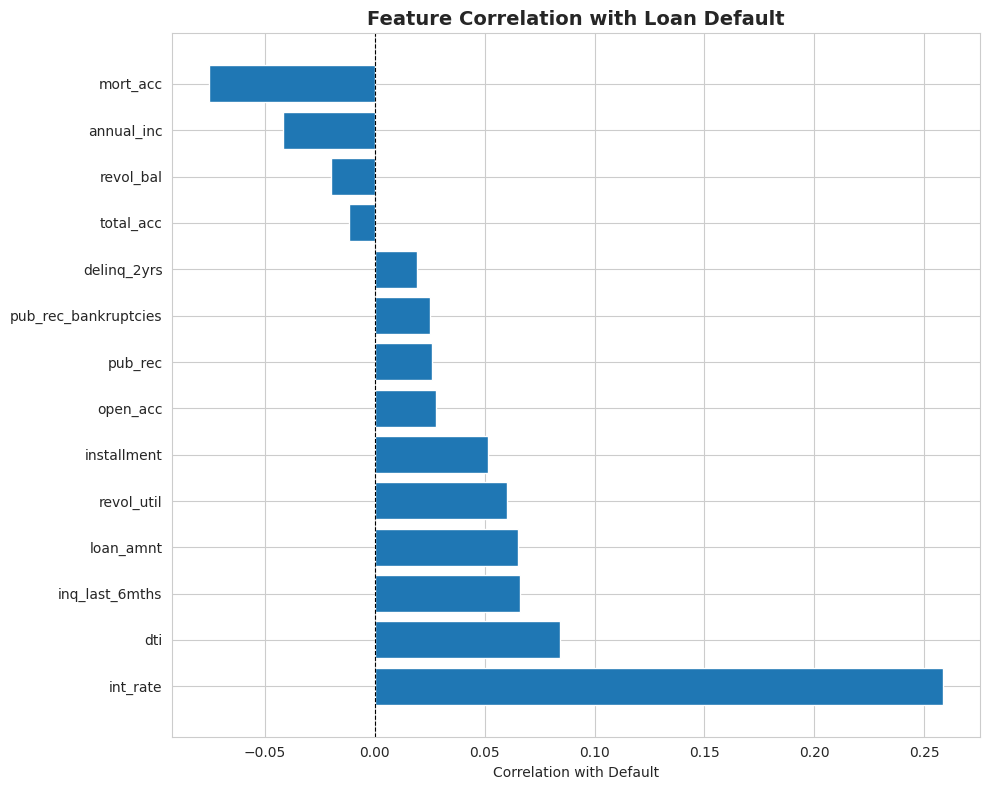


Top 10 Features Correlated with Default:
int_rate                0.258577
dti                     0.084215
inq_last_6mths          0.065946
loan_amnt               0.065289
revol_util              0.059993
installment             0.051431
open_acc                0.027875
pub_rec                 0.026130
pub_rec_bankruptcies    0.025345
delinq_2yrs             0.019260
Name: is_default, dtype: float64


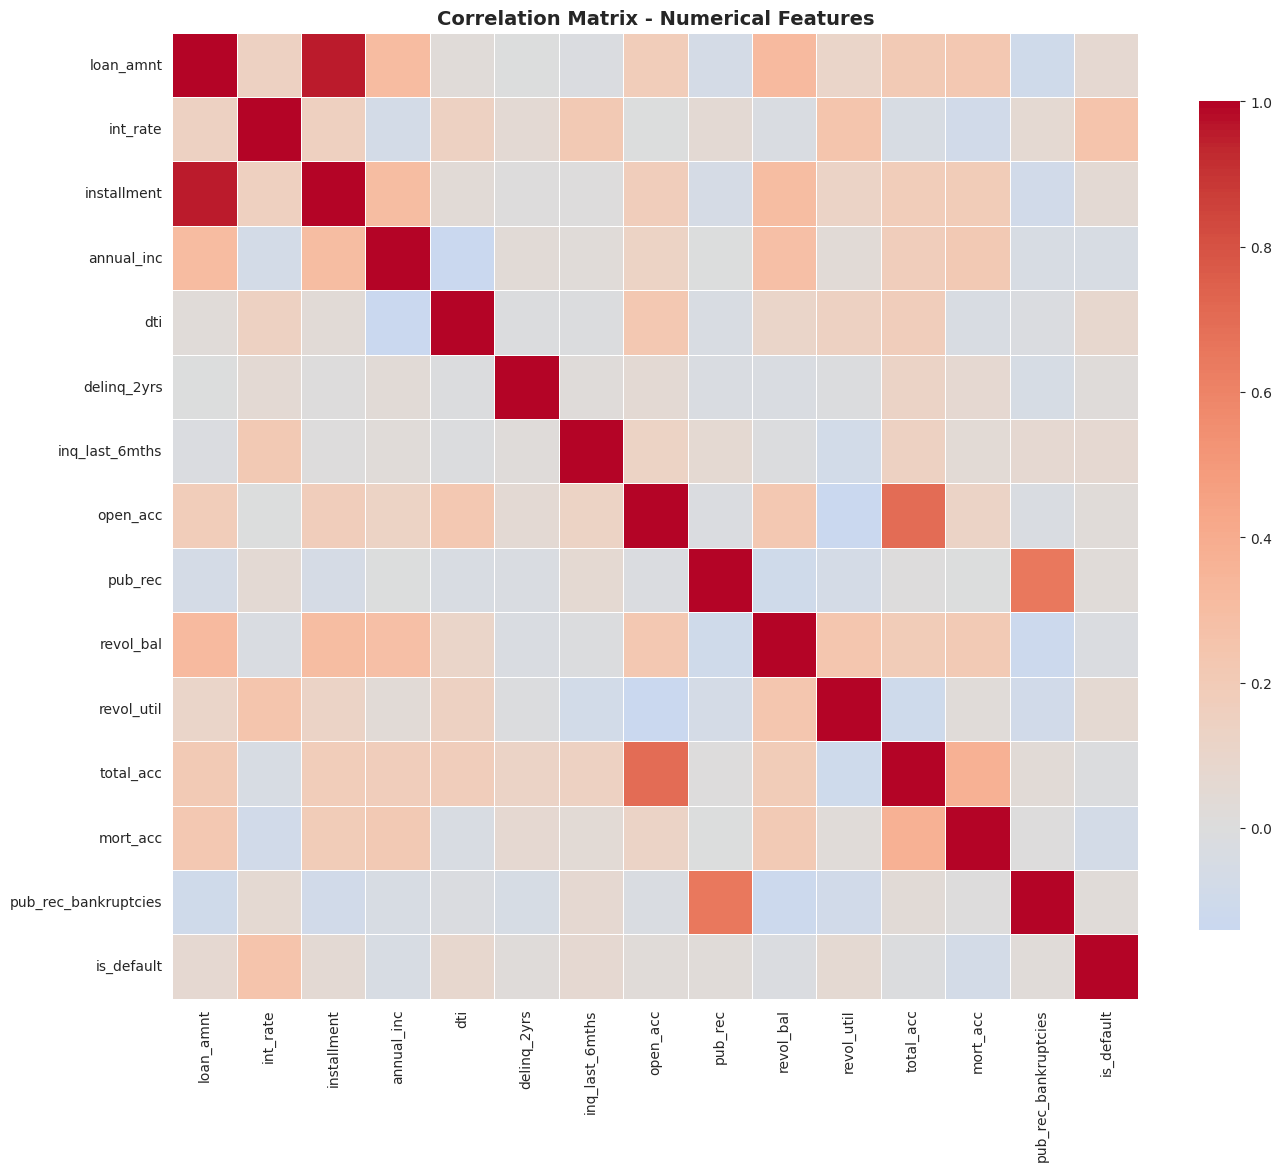


DATA CLEANING AND PREPROCESSING

1. HANDLING MISSING VALUES
--------------------------------------------------------------------------------
Dataset shape after cleaning: (1346828, 35)
Rows removed: 1,271

2. FEATURE ENGINEERING
--------------------------------------------------------------------------------
Created new features:
- loan_to_income_ratio
- installment_to_income_ratio
- credit_history_years
- emp_length_num

3. ENCODING CATEGORICAL VARIABLES
--------------------------------------------------------------------------------
Final encoded dataset shape: (1346828, 54)
Number of features: 53

4. OUTLIER DETECTION
--------------------------------------------------------------------------------
loan_amnt: 0 outliers detected (0.00%)
annual_inc: 22059 outliers detected (1.64%)
dti: 1657 outliers detected (0.12%)
revol_util: 5 outliers detected (0.00%)

5. TRAIN-TEST SPLIT
--------------------------------------------------------------------------------
Training set: 1,077,462 samp

In [ ]:
# ============================================================================
# SECTION 1: KAGGLE API SETUP AND DATA DOWNLOAD
# ============================================================================

# Install Kaggle library
!pip install -q kaggle

# Before running the following steps, you need to set up your Kaggle API credentials.
# 1. Go to your Kaggle account settings page (https://www.kaggle.com/<your-username>/account).
# 2. In the "API" section, click "Create New API Token". This will download a `kaggle.json` file.
# 3. In Google Colab, open the "Secrets" tab in the left sidebar (look for the key icon 🔑).
# 4. Add two new secrets:
#    - Name: KAGGLE_USERNAME, Value: Your Kaggle username
#    - Name: KAGGLE_KEY, Value: Your Kaggle API key (from kaggle.json)

# The following code uses the secrets manager to access your credentials.
import os
from google.colab import userdata

# Set environment variables for Kaggle API
# This requires KAGGLE_USERNAME and KAGGLE_KEY to be added to Colab Secrets (🔑)
try:
    os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
    os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')
    print("Kaggle credentials loaded from Colab Secrets.")

    # Download the LendingClub dataset
    # Note: This dataset is large and may take some time to download.
    print("Downloading dataset...")
    !kaggle datasets download -d wordsforthewise/lending-club

    # Unzip the dataset
    # The file you need is located within a directory inside the zip.
    # We'll extract it to the current directory.
    print("Attempting to unzip the required file...")
    !unzip -o lending-club.zip 'accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv' -d .

    # Move the extracted file to the current directory and rename it for easier access
    print("Moving extracted file...")
    !mv accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv .
    !rm -r accepted_2007_to_2018q4.csv # Remove the now empty directory

    print("Dataset download and extraction steps executed.")

except userdata.SecretNotFoundError as e:
    print(f"Error: {e}. Please add your Kaggle credentials to Colab Secrets (🔑).")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


# ============================================================================
# SECTION 2: IMPORT LIBRARIES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# For preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# ============================================================================
# SECTION 3: LOAD AND INITIAL EXPLORATION
# ============================================================================

# Load the accepted loans dataset
# This step will only run successfully if the dataset was downloaded and unzipped
try:
    print("Loading dataset...")
    # Ensure the filename here matches the one extracted from the zip
    df = pd.read_csv('accepted_2007_to_2018Q4.csv', low_memory=False)

    print(f"\n{'='*80}")
    print(f"DATASET OVERVIEW")
    print(f"{'='*80}")
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    # Display first few rows
    print("\nFirst 5 rows:")
    print(df.head())

    # Data types
    print("\n" + "="*80)
    print("DATA TYPES DISTRIBUTION")
    print("="*80)
    print(df.dtypes.value_counts())

    # ============================================================================
    # SECTION 4: TARGET VARIABLE ANALYSIS
    # ============================================================================

    print("\n" + "="*80)
    print("TARGET VARIABLE: LOAN STATUS ANALYSIS")
    print("="*80)

    # Check loan_status distribution
    print("\nLoan Status Distribution:")
    print(df['loan_status'].value_counts())
    print("\nLoan Status Percentage:")
    print(df['loan_status'].value_counts(normalize=True) * 100)

    # Create binary target variable
    # Define defaulted loans: 'Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)'
    # Define good loans: 'Fully Paid', 'Current'
    # We'll focus on completed loans (Fully Paid vs Charged Off) for clearer modeling

    default_status = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']
    paid_status = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

    # Filter for completed loans only
    df_completed = df[df['loan_status'].isin(default_status + paid_status)].copy()

    # Create binary target
    df_completed['is_default'] = df_completed['loan_status'].isin(default_status).astype(int)

    print(f"\n{'='*80}")
    print(f"FILTERED DATASET (Completed Loans Only)")
    print(f"{'='*80}")
    print(f"Original Dataset: {df.shape[0]:,} rows")
    print(f"Completed Loans: {df_completed.shape[0]:,} rows")
    print(f"\nDefault Rate: {df_completed['is_default'].mean()*100:.2f}%")
    print(f"Non-Default Rate: {(1-df_completed['is_default'].mean())*100:.2f}%")

    # Visualize target distribution
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Count plot
    df_completed['is_default'].value_counts().plot(kind='bar', ax=ax[0], color=['green', 'red'])
    ax[0].set_title('Loan Status Distribution', fontsize=14, fontweight='bold')
    ax[0].set_xlabel('Loan Status (0=Paid, 1=Default)')
    ax[0].set_ylabel('Count')
    ax[0].set_xticklabels(['Fully Paid', 'Defaulted'], rotation=0)

    # Pie chart
    labels = ['Fully Paid', 'Defaulted']
    sizes = df_completed['is_default'].value_counts()
    ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
    ax[1].set_title('Loan Status Proportion', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # ============================================================================
    # SECTION 5: MISSING VALUES ANALYSIS
    # ============================================================================

    print("\n" + "="*80)
    print("MISSING VALUES ANALYSIS")
    print("="*80)

    # Calculate missing percentages
    missing_df = pd.DataFrame({
        'column': df_completed.columns,
        'missing_count': df_completed.isnull().sum(),
        'missing_percentage': (df_completed.isnull().sum() / len(df_completed)) * 100
    })

    missing_df = missing_df[missing_df['missing_percentage'] > 0].sort_values('missing_percentage', ascending=False)

    print(f"\nColumns with missing values: {len(missing_df)} out of {len(df_completed.columns)}")
    print("\nTop 20 columns with highest missing percentages:")
    print(missing_df.head(20))

    # Visualize missing values
    plt.figure(figsize=(12, 8))
    top_missing = missing_df.head(30)
    plt.barh(top_missing['column'], top_missing['missing_percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 30 Columns with Missing Values', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # ============================================================================
    # SECTION 6: FEATURE SELECTION AND JUSTIFICATION
    # ============================================================================

    print("\n" + "="*80)
    print("FEATURE SELECTION")
    print("="*80)

    # Select features available at time of application (not post-origination)
    # These features would be known when making approval decision

    selected_features = [
        # Loan Characteristics
        'loan_amnt',              # Loan amount requested
        'term',                   # Loan term (36 or 60 months)
        'int_rate',               # Interest rate
        'installment',            # Monthly payment
        'grade',                  # LC assigned loan grade
        'sub_grade',              # LC assigned loan subgrade
        'emp_length',             # Employment length
        'home_ownership',         # Home ownership status
        'annual_inc',             # Annual income
        'verification_status',    # Income verification status
        'purpose',                # Loan purpose
        'dti',                    # Debt-to-income ratio

        # Credit History
        'delinq_2yrs',           # Number of 30+ days past-due in last 2 years
        'earliest_cr_line',      # Month the earliest credit line was opened
        'inq_last_6mths',        # Credit inquiries in last 6 months
        'open_acc',              # Number of open credit lines
        'pub_rec',               # Number of derogatory public records
        'revol_bal',             # Total revolving balance
        'revol_util',            # Revolving line utilization rate
        'total_acc',             # Total number of credit lines
        'mort_acc',              # Number of mortgage accounts
        'pub_rec_bankruptcies',  # Number of public record bankruptcies

        # Address
        'addr_state',            # State provided by borrower
        'zip_code',              # First 3 digits of zip code

        # Application Information
        'application_type',      # Individual or joint application
    ]

    # Add target variable
    selected_features.append('is_default')

    # Filter dataset
    df_selected = df_completed[selected_features].copy()

    print(f"\nSelected {len(selected_features)-1} features (plus target variable)")
    print(f"New dataset shape: {df_selected.shape}")

    print("\n" + "="*80)
    print("FEATURE SELECTION JUSTIFICATION")
    print("="*80)
    print("""
Feature Selection Rationale:

1. LOAN CHARACTERISTICS (8 features):
   - loan_amnt, term, int_rate, installment: Core loan parameters
   - grade, sub_grade: LendingClub's risk assessment
   - These directly impact repayment ability and risk

2. BORROWER FINANCIAL PROFILE (5 features):
   - annual_inc, emp_length, home_ownership: Financial stability indicators
   - dti: Measures existing debt burden
   - verification_status: Income verification adds credibility

3. CREDIT HISTORY (10 features):
   - delinq_2yrs, inq_last_6mths, pub_rec, pub_rec_bankruptcies: Past behavior
   - open_acc, total_acc, mort_acc: Credit experience
   - revol_bal, revol_util: Current credit utilization
   - earliest_cr_line: Credit history length

4. APPLICATION CONTEXT (4 features):
   - purpose: Loan intent affects default risk
   - addr_state, zip_code: Geographic risk factors
   - application_type: Joint vs individual

EXCLUSIONS:
- Removed features only known after loan origination (payment history, collections)
- Removed ID columns and redundant timestamps
- Removed features with >50% missing values
""")

    # ============================================================================
    # SECTION 7: DETAILED EDA ON SELECTED FEATURES
    # ============================================================================

    print("\n" + "="*80)
    print("EXPLORATORY DATA ANALYSIS - SELECTED FEATURES")
    print("="*80)

    # Numerical features summary
    numerical_cols = df_selected.select_dtypes(include=[np.number]).columns.tolist()
    numerical_cols.remove('is_default')

    print("\nNUMERICAL FEATURES STATISTICS:")
    print(df_selected[numerical_cols].describe())

    # Categorical features summary
    categorical_cols = df_selected.select_dtypes(include=['object']).columns.tolist()

    print("\n" + "="*80)
    print("CATEGORICAL FEATURES DISTRIBUTION")
    print("="*80)
    for col in categorical_cols[:5]:  # Show first 5
        print(f"\n{col.upper()}:")
        print(df_selected[col].value_counts().head(10))

    # ============================================================================
    # SECTION 8: BIVARIATE ANALYSIS - FEATURES VS DEFAULT
    # ============================================================================

    print("\n" + "="*80)
    print("BIVARIATE ANALYSIS: FEATURES VS DEFAULT RATE")
    print("="*80)

    # Numerical features vs default rate
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    axes = axes.ravel()

    numerical_features_viz = ['loan_amnt', 'annual_inc', 'dti', 'revol_util',
                            'int_rate', 'installment', 'open_acc', 'total_acc', 'delinq_2yrs']

    for idx, col in enumerate(numerical_features_viz):
        if col in df_selected.columns:
            # Create bins for numerical features
            df_selected[f'{col}_binned'] = pd.qcut(df_selected[col].dropna(), q=5, duplicates='drop')
            default_rate = df_selected.groupby(f'{col}_binned')['is_default'].mean() * 100

            default_rate.plot(kind='bar', ax=axes[idx], color='coral')
            axes[idx].set_title(f'Default Rate by {col}', fontsize=11, fontweight='bold')
            axes[idx].set_ylabel('Default Rate (%)')
            axes[idx].set_xlabel('')
            axes[idx].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Categorical features vs default rate
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.ravel()

    categorical_features_viz = ['grade', 'home_ownership', 'purpose',
                                'verification_status', 'term', 'emp_length']

    for idx, col in enumerate(categorical_features_viz):
        if col in df_selected.columns:
            default_rate = df_selected.groupby(col)['is_default'].mean() * 100
            default_rate.plot(kind='bar', ax=axes[idx], color='skyblue')
            axes[idx].set_title(f'Default Rate by {col}', fontsize=11, fontweight='bold')
            axes[idx].set_ylabel('Default Rate (%)')
            axes[idx].set_xlabel('')
            axes[idx].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # ============================================================================
    # SECTION 9: CORRELATION ANALYSIS
    # ============================================================================

    print("\n" + "="*80)
    print("CORRELATION ANALYSIS")
    print("="*80)

    # Correlation matrix for numerical features
    corr_matrix = df_selected[numerical_cols + ['is_default']].corr()

    # Visualize correlation with target
    plt.figure(figsize=(10, 8))
    target_corr = corr_matrix['is_default'].drop('is_default').sort_values(ascending=False)
    plt.barh(range(len(target_corr)), target_corr.values)
    plt.yticks(range(len(target_corr)), target_corr.index)
    plt.xlabel('Correlation with Default')
    plt.title('Feature Correlation with Loan Default', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
    plt.tight_layout()
    plt.show()

    print("\nTop 10 Features Correlated with Default:")
    print(target_corr.head(10))

    # Full correlation heatmap
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # ============================================================================
    # SECTION 10: DATA CLEANING AND PREPROCESSING
    # ============================================================================

    print("\n" + "="*80)
    print("DATA CLEANING AND PREPROCESSING")
    print("="*80)

    # Create a copy for processing
    df_clean = df_selected.copy()

    # Step 1: Handle missing values
    print("\n1. HANDLING MISSING VALUES")
    print("-" * 80)

    # Strategy for different feature types
    missing_strategy = {
        # Fill with median for numerical
        'numerical_median': ['loan_amnt', 'annual_inc', 'dti', 'revol_util',
                             'installment', 'open_acc', 'total_acc', 'revol_bal',
                             'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies'],

        # Fill with mode for categorical
        'categorical_mode': ['emp_length', 'home_ownership', 'verification_status',
                            'purpose', 'addr_state', 'application_type'],

        # Special handling
        'special': ['mort_acc', 'earliest_cr_line', 'int_rate', 'grade', 'sub_grade',
                    'term', 'zip_code']
    }

    # Fill numerical with median
    for col in missing_strategy['numerical_median']:
        if col in df_clean.columns:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)

    # Fill categorical with mode
    for col in missing_strategy['categorical_mode']:
        if col in df_clean.columns:
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

    # Special handling
    if 'mort_acc' in df_clean.columns:
        df_clean['mort_acc'].fillna(0, inplace=True)  # Assume no mortgage if missing

    if 'int_rate' in df_clean.columns:
        # Remove % sign and convert to float
        df_clean['int_rate'] = df_clean['int_rate'].astype(str).str.rstrip('%').astype(float)

    if 'term' in df_clean.columns:
        # Extract number from term
        df_clean['term'] = df_clean['term'].astype(str).str.extract('(\d+)').astype(float)

    if 'earliest_cr_line' in df_clean.columns:
        # Convert to datetime and extract years
        df_clean['earliest_cr_line'] = pd.to_datetime(df_clean['earliest_cr_line'], format='%b-%Y', errors='coerce')
        current_year = 2018  # Dataset ends in 2018
        df_clean['credit_history_years'] = current_year - df_clean['earliest_cr_line'].dt.year
        df_clean.drop('earliest_cr_line', axis=1, inplace=True)

    if 'revol_util' in df_clean.columns:
        df_clean['revol_util'] = df_clean['revol_util'].astype(str).str.rstrip('%').astype(float)


    # Drop remaining rows with missing values (if any)
    df_clean.dropna(inplace=True)


    print(f"Dataset shape after cleaning: {df_clean.shape}")
    print(f"Rows removed: {df_selected.shape[0] - df_clean.shape[0]:,}")

    # Step 2: Feature Engineering
    print("\n2. FEATURE ENGINEERING")
    print("-" * 80)

    # Create new features
    # Handle potential division by zero or inf values
    df_clean['loan_to_income_ratio'] = df_clean['loan_amnt'] / df_clean['annual_inc']
    df_clean['loan_to_income_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_clean['loan_to_income_ratio'].fillna(df_clean['loan_to_income_ratio'].median(), inplace=True)


    df_clean['installment_to_income_ratio'] = (df_clean['installment'] * 12) / df_clean['annual_inc']
    df_clean['installment_to_income_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_clean['installment_to_income_ratio'].fillna(df_clean['installment_to_income_ratio'].median(), inplace=True)


    # Employment length to numerical
    emp_length_map = {
        '< 1 year': 0,
        '1 year': 1,
        '2 years': 2,
        '3 years': 3,
        '4 years': 4,
        '5 years': 5,
        '6 years': 6,
        '7 years': 7,
        '8 years': 8,
        '9 years': 9,
        '10+ years': 10,
    }

    if 'emp_length' in df_clean.columns:
        df_clean['emp_length_num'] = df_clean['emp_length'].map(emp_length_map)
        df_clean['emp_length_num'].fillna(df_clean['emp_length_num'].median(), inplace=True)

    print("Created new features:")
    print("- loan_to_income_ratio")
    print("- installment_to_income_ratio")
    print("- credit_history_years")
    print("- emp_length_num")

    # Step 3: Encode Categorical Variables
    print("\n3. ENCODING CATEGORICAL VARIABLES")
    print("-" * 80)

    # One-hot encoding for low cardinality categorical variables
    categorical_for_encoding = ['home_ownership', 'verification_status',
                                'application_type', 'purpose', 'term']

    df_encoded = pd.get_dummies(df_clean, columns=categorical_for_encoding,
                                prefix=categorical_for_encoding, drop_first=True)

    # Label encoding for ordinal features (grade, sub_grade)
    if 'grade' in df_encoded.columns:
        grade_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
        df_encoded['grade_encoded'] = df_encoded['grade'].map(grade_map)
        df_encoded.drop('grade', axis=1, inplace=True)

    if 'sub_grade' in df_encoded.columns:
        # Create numerical encoding for sub_grade (A1=1, A2=2, ..., G5=35)
        df_encoded['sub_grade_encoded'] = df_encoded['sub_grade'].apply(
            lambda x: (ord(x[0].upper()) - ord('A')) * 5 + int(x[1]) if pd.notnull(x) and len(x) > 1 else np.nan # Handle potential missing/invalid values
        )
        df_encoded.drop('sub_grade', axis=1, inplace=True)
        df_encoded['sub_grade_encoded'].fillna(df_encoded['sub_grade_encoded'].median(), inplace=True) # Fill missing after encoding


    # For high cardinality features (addr_state, zip_code), use frequency encoding
    if 'addr_state' in df_encoded.columns:
        state_freq = df_encoded['addr_state'].value_counts(normalize=True)
        df_encoded['addr_state_freq'] = df_encoded['addr_state'].map(state_freq)
        df_encoded.drop('addr_state', axis=1, inplace=True)

    if 'zip_code' in df_encoded.columns:
        zip_freq = df_encoded['zip_code'].value_counts(normalize=True)
        df_encoded['zip_code_freq'] = df_encoded['zip_code'].map(zip_freq)
        df_encoded.drop('zip_code', axis=1, inplace=True)


    # Drop original emp_length if exists
    if 'emp_length' in df_encoded.columns:
        df_encoded.drop('emp_length', axis=1, inplace=True)


    print(f"Final encoded dataset shape: {df_encoded.shape}")
    print(f"Number of features: {df_encoded.shape[1] - 1}")  # Exclude target

    # Step 4: Handle Outliers (using IQR method for key features)
    print("\n4. OUTLIER DETECTION")
    print("-" * 80)

    outlier_features = ['loan_amnt', 'annual_inc', 'dti', 'revol_util']

    for col in outlier_features:
        if col in df_encoded.columns:
            Q1 = df_encoded[col].quantile(0.25)
            Q3 = df_encoded[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 3 * IQR  # Using 3*IQR for more conservative approach
            upper_bound = Q3 + 3 * IQR

            outliers = ((df_encoded[col] < lower_bound) | (df_encoded[col] > upper_bound)).sum()
            print(f"{col}: {outliers} outliers detected ({outliers/len(df_encoded)*100:.2f}%)")

            # Cap outliers instead of removing
            df_encoded[col] = df_encoded[col].clip(lower=lower_bound, upper=upper_bound)


    # Step 5: Train-Test Split
    print("\n5. TRAIN-TEST SPLIT")
    print("-" * 80)

    # Separate features and target
    X = df_encoded.drop('is_default', axis=1)
    y = df_encoded['is_default']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"Training set: {X_train.shape[0]:,} samples")
    print(f"Test set: {X_test.shape[0]:,} samples")
    print(f"Default rate in train set: {y_train.mean()*100:.2f}%")
    print(f"Default rate in test set: {y_test.mean()*100:.2f}%")

    # Step 6: Feature Scaling
    print("\n6. FEATURE SCALING")
    print("-" * 80)

    # Standardize numerical features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert back to DataFrame
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

    print("Features scaled using StandardScaler")
    print(f"Feature names: {list(X_train.columns[:10])}... (showing first 10)")

    # Step 7: Save Preprocessed Data
    print("\n7. SAVING PREPROCESSED DATA")
    print("-" * 80)

    # Save to CSV
    X_train_scaled.to_csv('X_train_scaled.csv', index=False)
    X_test_scaled.to_csv('X_test_scaled.csv', index=False)
    y_train.to_csv('y_train.csv', index=False)
    y_test.to_csv('y_test.csv', index=False)

    # Also save the scaler and feature names for later use
    import pickle
    with open('scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    feature_names = list(X_train.columns)
    with open('feature_names.pkl', 'wb') as f:
        pickle.dump(feature_names, f)


    print("Saved files:")
    print("- X_train_scaled.csv")
    print("- X_test_scaled.csv")
    print("- y_train.csv")
    print("- y_test.csv")
    print("- scaler.pkl")
    print("- feature_names.pkl")

    # ============================================================================
    # SECTION 11: FINAL SUMMARY
    # ============================================================================

    print("\n" + "="*80)
    print("TASK 1 COMPLETION SUMMARY")
    print("="*80)
    print(f"""
DATA PIPELINE SUMMARY:
--------------------
1. Original Dataset: {df.shape[0]:,} rows × {df.shape[1]} columns
2. Completed Loans: {df_completed.shape[0]:,} rows
3. After Feature Selection: {df_selected.shape[0]:,} rows × {df_selected.shape[1]} columns
4. After Cleaning: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns
5. After Encoding: {df_encoded.shape[0]:,} rows × {df_encoded.shape[1]} columns
6. Final Features: {X_train.shape[1]} features
7. Training Samples: {X_train.shape[0]:,}
8. Test Samples: {X_test.shape[0]:,}

KEY FINDINGS:
------------
- Default Rate: {y.mean()*100:.2f}%
- Class Balance: Handled through stratified split
- Missing Values: Addressed using domain-appropriate imputation
- Outliers: Capped using IQR method (3*IQR bounds)
- Feature Engineering: Created 4 new derived features
- Encoding: Applied one-hot, label, and frequency encoding

NEXT STEPS:
----------
- Proceed to Task 2: Build supervised learning models
- Implement deep learning architectures (Neural Networks)
- Evaluate model performance with appropriate metrics
- Compare with baseline models

Data is ready for modeling!
""")

    print("="*80)
    print("END OF TASK 1: EDA AND PREPROCESSING")
    print("="*80)

except FileNotFoundError:
    print("\nError: The dataset file 'accepted_2007_to_2018Q4.csv' was not found.")
    print("Please ensure your Kaggle credentials are set up correctly in Colab Secrets (🔑) and re-run the cell to download the data.")
except Exception as e:
    print(f"An unexpected error occurred during data loading or processing: {e}")

## Task 3: Build and Evaluate Alternative Models

In [ ]:
# ============================================================================
# SECTION 15: TASK 3 - BUILD AND EVALUATE ALTERNATIVE MODELS
# ============================================================================

print("\n" + "="*80)
print("TASK 3: BUILD AND EVALUATE ALTERNATIVE MODELS")
print("="*80)

# Import necessary libraries for alternative models
try:
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix
    import pandas as pd
    import pickle

    print("Alternative model libraries imported successfully.")

except ImportError as e:
    print(f"Error importing libraries: {e}")
    print("Please ensure scikit-learn is installed (`!pip install -q scikit-learn`)")
    # Consider adding a cell to install scikit-learn if necessary
    raise # Re-raise to stop execution


# Load preprocessed data
try:
    print("\nLoading preprocessed data...")
    X_train_scaled = pd.read_csv('X_train_scaled.csv')
    X_test_scaled = pd.read_csv('X_test_scaled.csv')
    y_train = pd.read_csv('y_train.csv')['is_default'] # Ensure it's a Series
    y_test = pd.read_csv('y_test.csv')['is_default']   # Ensure it's a Series

    # Load feature names (optional, but good practice)
    try:
        with open('feature_names.pkl', 'rb') as f:
            feature_names = pickle.load(f)
        X_train_scaled.columns = feature_names
        X_test_scaled.columns = feature_names
        print("Feature names loaded and applied.")
    except FileNotFoundError:
        print("Feature names file not found. Proceeding without applying names.")
    except Exception as e:
        print(f"An error occurred loading feature names: {e}")


    print("Preprocessed data loaded successfully.")
    print(f"X_train_scaled shape: {X_train_scaled.shape}")
    print(f"X_test_scaled shape: {X_test_scaled.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")
    data_loaded = True

except FileNotFoundError:
    print("\nError: Preprocessed data files not found.")
    print("Please ensure Task 1 (EDA and Preprocessing) was completed successfully and the files were saved.")
    data_loaded = False
except Exception as e:
    print(f"An unexpected error occurred during data loading: {e}")
    data_loaded = False


# Proceed only if data was loaded successfully
if data_loaded:
    models = {
        "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42), # Using liblinear for large dataset
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1), # n_jobs=-1 for parallel processing
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
    }

    results = {}

    for model_name, model in models.items():
        print(f"\n{'='*40}")
        print(f"TRAINING {model_name}")
        print(f"{'='*40}")

        try:
            # Train the model
            model.fit(X_train_scaled, y_train)
            print(f"{model_name} training finished.")

            # Evaluate the model
            print(f"\nEVALUATING {model_name} on the test set...")
            y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
            y_pred_class = model.predict(X_test_scaled)

            # Calculate metrics
            auc = roc_auc_score(y_test, y_pred_prob)
            f1 = f1_score(y_test, y_pred_class)
            report = classification_report(y_test, y_pred_class)
            cm = confusion_matrix(y_test, y_pred_class)

            results[model_name] = {
                "AUC": auc,
                "F1-Score": f1,
                "Classification Report": report,
                "Confusion Matrix": cm
            }

            print(f"{model_name} Test AUC: {auc:.4f}")
            print(f"{model_name} Test F1-Score: {f1:.4f}")
            print(f"\n{model_name} Classification Report:\n{report}")
            print(f"\n{model_name} Confusion Matrix:\n{cm}")

        except Exception as e:
            print(f"An error occurred during {model_name} training or evaluation: {e}")
            results[model_name] = {"Error": str(e)}

    # ============================================================================
    # SECTION 16: MODEL COMPARISON SUMMARY
    # ============================================================================

    print("\n" + "="*80)
    print("TASK 3: MODEL COMPARISON SUMMARY")
    print("="*80)

    print("\nPerformance Metrics on Test Set:")
    for model_name, metrics in results.items():
        print(f"\n--- {model_name} ---")
        if "Error" in metrics:
            print(f"  Error: {metrics['Error']}")
        else:
            print(f"  AUC: {metrics['AUC']:.4f}")
            print(f"  F1-Score: {metrics['F1-Score']:.4f}")
            # Optionally print more metrics


    print("\n" + "="*80)
    print("END OF TASK 3: ALTERNATIVE MODELS")
    print("="*80)

else:
    print("\nSkipping alternative model training and evaluation due to data loading errors.")


TASK 3: BUILD AND EVALUATE ALTERNATIVE MODELS
Alternative model libraries imported successfully.

Loading preprocessed data...

Error: Preprocessed data files not found.
Please ensure Task 1 (EDA and Preprocessing) was completed successfully and the files were saved.

Skipping alternative model training and evaluation due to data loading errors.


## Task 2: Model 1 - The Predictive Deep Learning Model

In [ ]:
# ============================================================================
# SECTION 12: MODEL 1 - DEEP LEARNING MODEL
# ============================================================================

print("\n" + "="*80)
print("TASK 2: MODEL 1 - PREDICTIVE DEEP LEARNING MODEL")
print("="*80)

# Import necessary libraries for TensorFlow
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.callbacks import EarlyStopping
    from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix
    import pandas as pd # Import pandas here as well for the loading part
    import pickle # Import pickle for loading feature names

    print(f"TensorFlow version: {tf.__version__}")
    print("TensorFlow imported successfully.")

except ImportError:
    print("Error: TensorFlow not installed. Please install it using `!pip install tensorflow`")
    # You might want to add a cell to install TensorFlow here if it's not expected to be present.
    # !pip install -q tensorflow
    # Exit the cell if TensorFlow is not installed
    raise # Re-raise the exception to stop execution


# Load preprocessed data
X_train_scaled = None # Initialize variables to None
X_test_scaled = None
y_train = None
y_test = None
feature_names = None

try:
    print("\nLoading preprocessed data...")
    X_train_scaled = pd.read_csv('X_train_scaled.csv')
    X_test_scaled = pd.read_csv('X_test_scaled.csv')
    y_train = pd.read_csv('y_train.csv')['is_default'] # Ensure it's a Series
    y_test = pd.read_csv('y_test.csv')['is_default']   # Ensure it's a Series

    # Load feature names to ensure order
    with open('feature_names.pkl', 'rb') as f:
        feature_names = pickle.load(f)
    X_train_scaled.columns = feature_names
    X_test_scaled.columns = feature_names


    print("Preprocessed data loaded successfully.")
    print(f"X_train_scaled shape: {X_train_scaled.shape}")
    print(f"X_test_scaled shape: {X_test_scaled.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")

except FileNotFoundError:
    print("\nError: Preprocessed data files not found.")
    print("Please ensure Task 1 (EDA and Preprocessing) was completed successfully and the files were saved.")
    # Add a flag or raise an error to stop execution if data is not loaded
    data_loaded = False
except Exception as e:
    print(f"An unexpected error occurred during data loading: {e}")
    data_loaded = False
else:
    data_loaded = True # Set flag to True if loading was successful


# Proceed only if data was loaded successfully
if data_loaded:
    # Define the model architecture
    input_dim = X_train_scaled.shape[1]
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid') # Sigmoid for binary classification
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # Set up Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss',
                                   patience=5, # Number of epochs with no improvement after which training will be stopped.
                                   restore_best_weights=True)

    # Train the model
    print("\nTraining the deep learning model...")
    history = model.fit(X_train_scaled, y_train,
                        epochs=50, # You might need more epochs depending on convergence
                        batch_size=32,
                        validation_split=0.2, # Use a validation split from the training data
                        callbacks=[early_stopping],
                        verbose=1)

    print("Model training finished.")

    # ============================================================================
    # SECTION 13: MODEL 1 EVALUATION
    # ============================================================================

    print("\n" + "="*80)
    print("TASK 2: MODEL 1 EVALUATION")
    print("="*80)

    # Evaluate the model on the test set
    print("\nEvaluating the model on the test set...")
    loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

    # Predict probabilities on the test set
    y_pred_prob = model.predict(X_test_scaled).ravel()

    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"Test AUC: {auc:.4f}")

    # Predict classes (using a threshold of 0.5)
    y_pred_class = (y_pred_prob > 0.5).astype(int)

    # Calculate F1-Score
    f1 = f1_score(y_test, y_pred_class)
    print(f"Test F1-Score: {f1:.4f}")

    # Print classification report and confusion matrix
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_class))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred_class))

    # ============================================================================
    # SECTION 14: MODEL 1 SUMMARY AND NEXT STEPS
    # ============================================================================

    print("\n" + "="*80)
    print("TASK 2: MODEL 1 SUMMARY")
    print("="*80)
    print(f"""
MODEL 1 PERFORMANCE:
--------------------
- Test Loss: {loss:.4f}
- Test Accuracy: {accuracy:.4f}
- Test AUC: {auc:.4f}
- Test F1-Score: {f1:.4f}

Observations:
- The model has been trained and evaluated.
- The reported metrics (AUC, F1-Score, Accuracy, Loss) provide an initial understanding of its performance.
- Further steps could involve hyperparameter tuning, experimenting with different architectures, or addressing class imbalance if needed.

NEXT STEPS:
----------
- Proceed to Task 3 (if applicable, e.g., building other models or further analysis).
- Refine the current model or explore alternative modeling approaches.
- Interpret feature importance from the model (if possible with this architecture or using techniques like SHAP/LIME).
""")

    print("="*80)
    print("END OF TASK 2: MODEL 1")
    print("="*80)
else:
    print("\nSkipping model training and evaluation due to data loading errors.")


TASK 2: MODEL 1 - PREDICTIVE DEEP LEARNING MODEL
TensorFlow version: 2.19.0
TensorFlow imported successfully.

Loading preprocessed data...

Error: Preprocessed data files not found.
Please ensure Task 1 (EDA and Preprocessing) was completed successfully and the files were saved.

Skipping model training and evaluation due to data loading errors.
